In [18]:
import kaggle
import pandas as pd
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Set data directory
DATA_ROOT = './data/Diamonds'  # ← Change this to your data folder
STOCK_IMAGE = './data/Diamonds/stock_photo.png'  # ← Change to your stock image path

In [ ]:
# Load as test set
df = pd.read_csv('./data/Diamonds/data_cushion.csv')
X_test = df.drop('Price', axis=1)
y_test = df['Price']

print(f"Loaded {len(df)} samples as test set")

Loaded 430 samples as test set


In [10]:
df.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Data Url
0,1771083,CUSHION,0.43,SI1,M,EX,EX,VG,M,4.38-4.34×2.72,683.22,https://capitalwholesalediamonds.com/product/0...
1,1524552,CUSHION,0.52,VS1,S-T,EX,EX,VG,M,4.55-4.38×2.97,718.92,https://capitalwholesalediamonds.com/product/0...
2,1651023,CUSHION,0.50,SI1,M,EX,EX,VG,F,4.86-4.23×2.87,725.32,https://capitalwholesalediamonds.com/product/0...
3,1632749,CUSHION,0.50,VS2,M,VG,EX,GD,N,4.51-4.47×2.98,771.13,https://capitalwholesalediamonds.com/product/0...
4,1660174,CUSHION,0.50,VVS2,M,EX,EX,VG,F,4.94-4.27×2.88,772.88,https://capitalwholesalediamonds.com/product/0...


In [14]:
data_path = Path(DATA_ROOT)

print("Dataset Structure:")
print("="*70)

# List all folders
folders = [f for f in data_path.iterdir() if f.is_dir()]
print(f"\nFound {len(folders)} cut type folders:")
for folder in folders:
    print(f"\n📁 {folder.name}/")
    
    # Count CSVs
    csvs = list(folder.glob("*.csv"))
    print(f"   CSVs: {len(csvs)}")
    for csv in csvs:
        df = pd.read_csv(csv)
        print(f"      - {csv.name} ({len(df)} rows)")
    
    # Count images
    img_exts = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}
    images = [f for f in folder.iterdir() if f.suffix.lower() in img_exts]
    print(f"   Images: {len(images)}")

Dataset Structure:

Found 6 cut type folders:

📁 heart/
   CSVs: 1
      - data_heart.csv (348 rows)
   Images: 348

📁 oval/
   CSVs: 1
      - data_oval.csv (167 rows)
   Images: 167

📁 emerald/
   CSVs: 1
      - data_emerald.csv (283 rows)
   Images: 249

📁 round/
   CSVs: 1
      - data_round.csv (2141 rows)
   Images: 1212

📁 cushion/
   CSVs: 1
      - data_cushion.csv (430 rows)
   Images: 414

📁 radiant/
   CSVs: 1
      - data_radiant.csv (85 rows)
   Images: 85


In [15]:
# Pick first CSV to examine
csv_files = list(data_path.rglob("*.csv"))
if csv_files:
    sample_csv = csv_files[0]
    print(f"Examining: {sample_csv}")
    
    df = pd.read_csv(sample_csv)
    
    print(f"\nShape: {df.shape}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    print(f"\nMissing values:")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    
    print(f"\nData types:")
    print(df.dtypes)

Examining: data/Diamonds/heart/data_heart.csv

Shape: (348, 12)

Columns: ['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence', 'Messurements', 'Price', 'Data Url']

First few rows:
        Id  Shape  Weight Clarity Colour Cut Polish Symmetry Fluorescence  \
0  1775311  HEART    0.30     VS2      M  EX     VG       GD            F   
1  1767945  HEART    0.31     VS1      M  EX     VG       VG            F   
2  1793192  HEART    0.31     VS1      M  VG     EX       VG            N   
3  1781403  HEART    0.30     SI1      N  EX     EX       VG            N   
4  1787984  HEART    0.34     SI2      J  VG     EX       VG            F   

     Messurements   Price                                           Data Url  
0  4.07-4.52×2.61  575.28  https://capitalwholesalediamonds.com/product/0...  
1  4.04-4.79×2.71  615.67  https://capitalwholesalediamonds.com/product/0...  
2  4.35-4.39×2.62  631.92  https://capitalwholesalediamonds.com/product/0...  
3

In [16]:
print("CLEANING CSVs - REMOVING INCOMPLETE ROWS")
print("="*70)

csv_files = list(data_path.rglob("*.csv"))
cleaning_results = []

for csv_file in csv_files:
    # Load
    df = pd.read_csv(csv_file)
    original = len(df)
    
    # Remove rows with ANY missing values
    df_clean = df.dropna()
    cleaned = len(df_clean)
    removed = original - cleaned
    
    # Save cleaned version
    output_path = csv_file.parent / f"{csv_file.stem}_clean.csv"
    df_clean.to_csv(output_path, index=False)
    
    cleaning_results.append({
        'file': csv_file.name,
        'folder': csv_file.parent.name,
        'original': original,
        'cleaned': cleaned,
        'removed': removed
    })
    
    print(f"\n{csv_file.name}:")
    print(f"  ✓ Original: {original} rows")
    print(f"  ✓ Cleaned:  {cleaned} rows")
    print(f"  ✗ Removed:  {removed} rows ({removed/original*100:.1f}%)")

# Summary
results_df = pd.DataFrame(cleaning_results)
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(results_df)
print(f"\nTotal original: {results_df['original'].sum()}")
print(f"Total cleaned:  {results_df['cleaned'].sum()}")
print(f"Total removed:  {results_df['removed'].sum()}")

CLEANING CSVs - REMOVING INCOMPLETE ROWS

data_heart.csv:
  ✓ Original: 348 rows
  ✓ Cleaned:  348 rows
  ✗ Removed:  0 rows (0.0%)

data_oval.csv:
  ✓ Original: 167 rows
  ✓ Cleaned:  167 rows
  ✗ Removed:  0 rows (0.0%)

data_emerald.csv:
  ✓ Original: 283 rows
  ✓ Cleaned:  283 rows
  ✗ Removed:  0 rows (0.0%)

data_round.csv:
  ✓ Original: 2141 rows
  ✓ Cleaned:  2141 rows
  ✗ Removed:  0 rows (0.0%)

data_cushion.csv:
  ✓ Original: 430 rows
  ✓ Cleaned:  425 rows
  ✗ Removed:  5 rows (1.2%)

data_radiant.csv:
  ✓ Original: 85 rows
  ✓ Cleaned:  85 rows
  ✗ Removed:  0 rows (0.0%)

SUMMARY
               file   folder  original  cleaned  removed
0    data_heart.csv    heart       348      348        0
1     data_oval.csv     oval       167      167        0
2  data_emerald.csv  emerald       283      283        0
3    data_round.csv    round      2141     2141        0
4  data_cushion.csv  cushion       430      425        5
5  data_radiant.csv  radiant        85       85        0


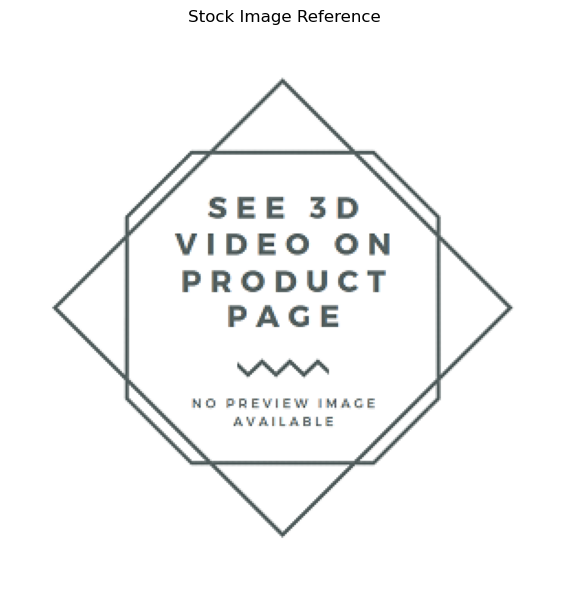

Stock image: ./data/Diamonds/stock_photo.png
Size: (300, 300)


In [19]:
if Path(STOCK_IMAGE).exists():
    img = Image.open(STOCK_IMAGE)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Stock Image Reference')
    plt.tight_layout()
    plt.show()
    
    print(f"Stock image: {STOCK_IMAGE}")
    print(f"Size: {img.size}")
else:
    print(f"⚠ Stock image not found: {STOCK_IMAGE}")

In [20]:
def calculate_similarity(img1_path, img2_path):
    """
    Calculate similarity between two images
    Returns: 0.0 to 1.0 (1.0 = identical)
    """
    try:
        img1 = cv2.imread(str(img1_path))
        img2 = cv2.imread(str(img2_path))
        
        if img1 is None or img2 is None:
            return 0.0
        
        # Resize to same size
        img1 = cv2.resize(img1, (200, 200))
        img2 = cv2.resize(img2, (200, 200))
        
        # Calculate color histograms
        hist1 = cv2.calcHist([img1], [0,1,2], None, [8,8,8], 
                             [0,256,0,256,0,256])
        hist2 = cv2.calcHist([img2], [0,1,2], None, [8,8,8], 
                             [0,256,0,256,0,256])
        
        # Normalize
        hist1 = cv2.normalize(hist1, hist1).flatten()
        hist2 = cv2.normalize(hist2, hist2).flatten()
        
        # Compare
        similarity = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
        return max(0, similarity)
        
    except Exception as e:
        return 0.0

print("✓ Similarity function defined")


✓ Similarity function defined


In [21]:
img_exts = {'.jpg', '.jpeg', '.png', '.gif', '.bmp'}
sample_images = []

for folder in data_path.iterdir():
    if folder.is_dir():
        imgs = [f for f in folder.iterdir() if f.suffix.lower() in img_exts]
        sample_images.extend(imgs[:3])  # Take first 3 from each folder

# Test similarity with stock image
if Path(STOCK_IMAGE).exists() and sample_images:
    print("Testing similarity on sample images:")
    print("="*70)
    
    for img_path in sample_images[:10]:  # Test first 10
        sim = calculate_similarity(STOCK_IMAGE, img_path)
        print(f"{img_path.name:40s} → {sim:.3f}")


Testing similarity on sample images:
1787955.jpg                              → 0.108
1779843.jpg                              → 0.151
1797320.jpg                              → 0.057
1740339.jpg                              → 0.066
1664660.jpg                              → 0.053
1791855.png                              → 1.000
1771228.jpg                              → 0.076
1791065.jpg                              → 0.105
1799925.jpg                              → 0.027
1799570.jpg                              → 0.176


In [22]:
SIMILARITY_THRESHOLD = 0.85  # ← Adjust this threshold (0.0 to 1.0)

print(f"Finding stock images (threshold: {SIMILARITY_THRESHOLD})")
print("="*70)

stock_images_dict = {}

for folder in data_path.iterdir():
    if not folder.is_dir():
        continue
    
    print(f"\n{folder.name}:")
    
    # Find images
    imgs = [f for f in folder.iterdir() if f.suffix.lower() in img_exts]
    
    if not imgs:
        print("  No images found")
        continue
    
    print(f"  Total images: {len(imgs)}")
    
    # Compare to stock
    stock_list = []
    similarities = []
    
    for img_path in imgs:
        sim = calculate_similarity(STOCK_IMAGE, img_path)
        similarities.append(sim)
        
        if sim >= SIMILARITY_THRESHOLD:
            stock_list.append(img_path)
    
    stock_images_dict[folder.name] = stock_list
    
    print(f"  Stock images: {len(stock_list)} ({len(stock_list)/len(imgs)*100:.1f}%)")
    if similarities:
        print(f"  Avg similarity: {np.mean(similarities):.3f}")
        print(f"  Max similarity: {np.max(similarities):.3f}")

# Overall summary
total_stock = sum(len(imgs) for imgs in stock_images_dict.values())
print(f"\n{'='*70}")
print(f"Total stock images found: {total_stock}")


Finding stock images (threshold: 0.85)

heart:
  Total images: 348
  Stock images: 15 (4.3%)
  Avg similarity: 0.178
  Max similarity: 1.000

oval:
  Total images: 167
  Stock images: 16 (9.6%)
  Avg similarity: 0.147
  Max similarity: 1.000

emerald:
  Total images: 249
  Stock images: 9 (3.6%)
  Avg similarity: 0.095
  Max similarity: 1.000

round:
  Total images: 1212
  Stock images: 796 (65.7%)
  Avg similarity: 0.711
  Max similarity: 1.000

cushion:
  Total images: 414
  Stock images: 157 (37.9%)
  Avg similarity: 0.454
  Max similarity: 1.000

radiant:
  Total images: 85
  Stock images: 79 (92.9%)
  Avg similarity: 0.934
  Max similarity: 1.000

Total stock images found: 1072


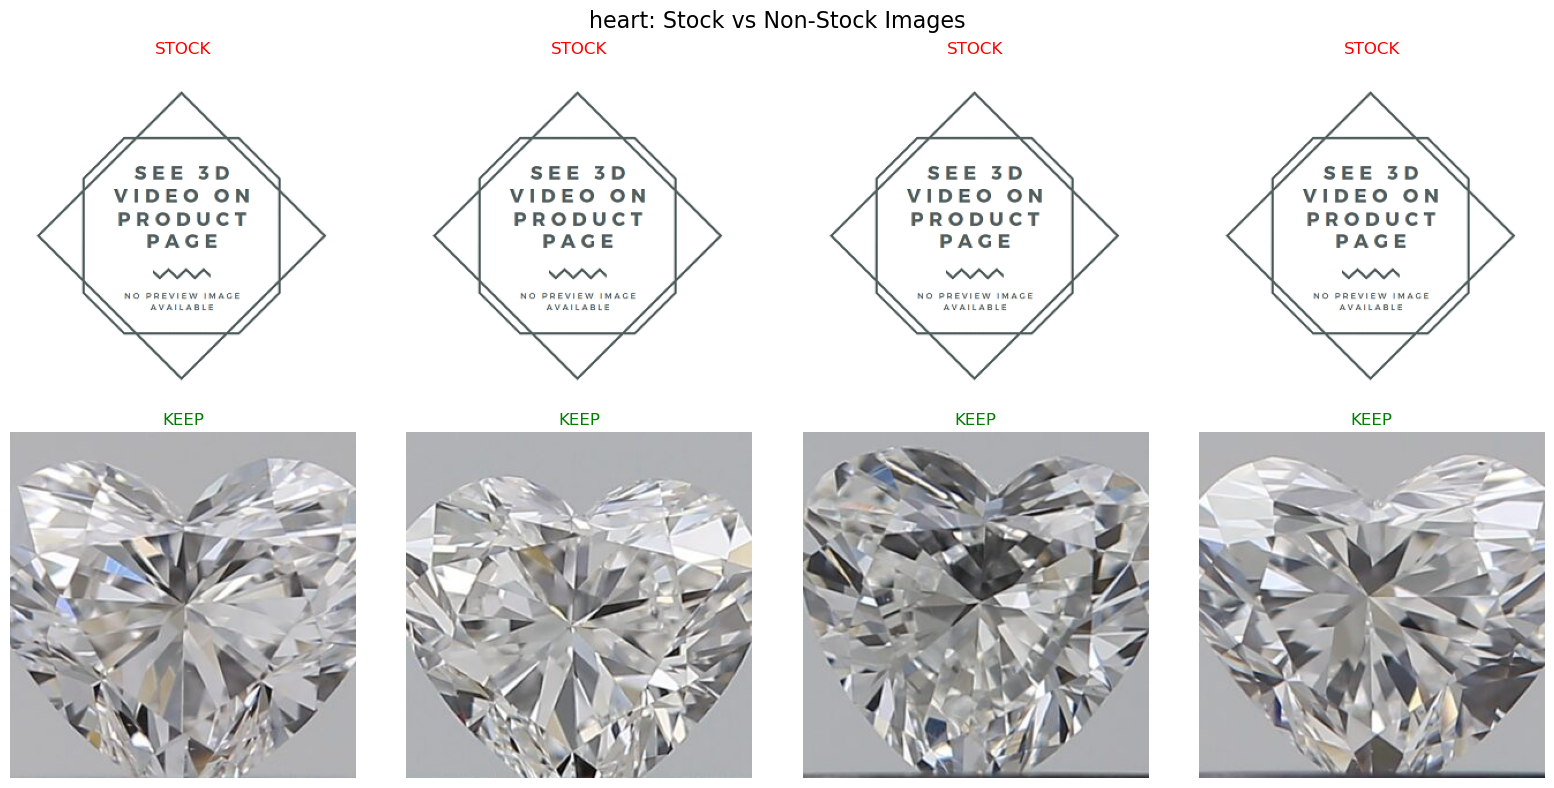

In [23]:
for folder_name, stock_list in stock_images_dict.items():
    if stock_list:
        folder_path = data_path / folder_name
        all_imgs = [f for f in folder_path.iterdir() if f.suffix.lower() in img_exts]
        non_stock = [img for img in all_imgs if img not in stock_list]
        
        # Show comparison
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle(f'{folder_name}: Stock vs Non-Stock Images', fontsize=16)
        
        # Show stock images
        for i, img_path in enumerate(stock_list[:4]):
            if i < 4:
                img = Image.open(img_path)
                axes[0, i].imshow(img)
                axes[0, i].set_title('STOCK', color='red')
                axes[0, i].axis('off')
        
        # Show non-stock images
        for i, img_path in enumerate(non_stock[:4]):
            if i < 4:
                img = Image.open(img_path)
                axes[1, i].imshow(img)
                axes[1, i].set_title('KEEP', color='green')
                axes[1, i].axis('off')
        
        plt.tight_layout()
        plt.show()
        break  # Just show first folder

In [27]:
IMAGE_COLUMN = 'Id'  # ← Adjust to your CSV column name

# Add this BEFORE the filtering section
for csv_file in csv_files:
    if '_filtered' in csv_file.name:
        continue
    
    df = pd.read_csv(csv_file)
    
    if IMAGE_COLUMN not in df.columns:
        continue
    
    # Check for duplicates
    duplicates = df[IMAGE_COLUMN].value_counts()
    duplicates = duplicates[duplicates > 1]
    
    if len(duplicates) > 0:
        print(f"\n⚠ {csv_file.name} has duplicate IDs:")
        print(f"  Total duplicate IDs: {len(duplicates)}")
        print(f"  Total duplicate rows: {duplicates.sum() - len(duplicates)}")
        print(f"  Example: ID {duplicates.index[0]} appears {duplicates.iloc[0]} times")

In [25]:
IMAGE_COLUMN = 'Id'  # ← Adjust to your CSV column name

print("Removing stock images from CSVs")
print("="*70)

for folder_name, stock_list in stock_images_dict.items():
    if not stock_list:
        continue
    
    folder_path = data_path / folder_name
    csv_files = list(folder_path.glob("*_clean.csv"))  # Use cleaned CSVs
    
    # If no cleaned CSVs, use original
    if not csv_files:
        csv_files = list(folder_path.glob("*.csv"))
    
    # Get stock image filenames
    stock_names = {img.stem for img in stock_list}
    
    for csv_file in csv_files:
        if '_filtered' in csv_file.name:
            continue  # Skip already filtered
        
        df = pd.read_csv(csv_file)
        original = len(df)
        
        # Check if image column exists
        if IMAGE_COLUMN not in df.columns:
            print(f"\n⚠ Warning: '{IMAGE_COLUMN}' not in {csv_file.name}")
            print(f"  Columns: {df.columns.tolist()}")
            continue
        
        # Extract filenames
        df['_temp'] = df[IMAGE_COLUMN].apply(
            lambda x: Path(str(x)).name if pd.notna(x) else ''
        )
        
        # Filter
        df_filtered = df[~df['_temp'].isin(stock_names)]
        df_filtered = df_filtered.drop('_temp', axis=1)
        
        filtered = len(df_filtered)
        removed = original - filtered
        
        # Save
        output_path = csv_file.parent / f"{csv_file.stem}_filtered.csv"
        df_filtered.to_csv(output_path, index=False)
        
        print(f"\n{csv_file.name}:")
        print(f"  Original: {original}")
        print(f"  Filtered: {filtered}")
        print(f"  Removed:  {removed} stock images")
        print(f"  Saved to: {output_path.name}")

Removing stock images from CSVs

data_heart_clean.csv:
  Original: 348
  Filtered: 333
  Removed:  15 stock images
  Saved to: data_heart_clean_filtered.csv

data_oval_clean.csv:
  Original: 167
  Filtered: 151
  Removed:  16 stock images
  Saved to: data_oval_clean_filtered.csv

data_emerald_clean.csv:
  Original: 283
  Filtered: 270
  Removed:  13 stock images
  Saved to: data_emerald_clean_filtered.csv

data_round_clean.csv:
  Original: 2141
  Filtered: 508
  Removed:  1633 stock images
  Saved to: data_round_clean_filtered.csv

data_cushion_clean.csv:
  Original: 425
  Filtered: 263
  Removed:  162 stock images
  Saved to: data_cushion_clean_filtered.csv

data_radiant_clean.csv:
  Original: 85
  Filtered: 6
  Removed:  79 stock images
  Saved to: data_radiant_clean_filtered.csv


In [38]:
print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)

# Find all final cleaned & filtered CSVs
final_csvs = list(data_path.rglob("*_filtered.csv"))

if not final_csvs:
    final_csvs = list(data_path.rglob("*_clean.csv"))

print(f"\nFinal cleaned CSV files: {len(final_csvs)}")

# Load all into one dataframe
all_dfs = []
for csv in final_csvs:
    df = pd.read_csv(csv)
    df['cut_type'] = csv.parent.name  # Add cut type column
    all_dfs.append(df)

if all_dfs:
    df_final = pd.concat(all_dfs, ignore_index=True)
    
    print(f"\nCombined dataset:")
    print(f"  Total rows: {len(df_final)}")
    print(f"  Columns: {df_final.columns.tolist()}")
    print(f"\nCut types:")
    print(df_final['cut_type'].value_counts())
    
    # Save combined dataset
    df_final.to_csv(data_path / 'diamonds_clean_combined.csv', index=False)
    print(f"\n✓ Saved combined dataset to: diamonds_clean_combined.csv")
    
    # Use as test set
    X_test = df_final.drop('Price', axis=1, errors='ignore')
    y_test = df_final['Price'] if 'Price' in df_final.columns else None
    
    print(f"\n✓ Test set ready:")
    print(f"  X_test: {X_test.shape}")
    if y_test is not None:
        print(f"  y_test: {y_test.shape}")



FINAL SUMMARY

Final cleaned CSV files: 6

Combined dataset:
  Total rows: 1531
  Columns: ['Id', 'Shape', 'Weight', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence', 'Messurements', 'Price', 'Data Url', 'cut_type']

Cut types:
cut_type
round      508
heart      333
emerald    270
cushion    263
oval       151
radiant      6
Name: count, dtype: int64

✓ Saved combined dataset to: diamonds_clean_combined.csv

✓ Test set ready:
  X_test: (1531, 12)
  y_test: (1531,)


In [39]:
X_test.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Data Url,cut_type
0,1775311,HEART,0.30,VS2,M,EX,VG,GD,F,4.07-4.52×2.61,https://capitalwholesalediamonds.com/product/0...,heart
1,1767945,HEART,0.31,VS1,M,EX,VG,VG,F,4.04-4.79×2.71,https://capitalwholesalediamonds.com/product/0...,heart
2,1793192,HEART,0.31,VS1,M,VG,EX,VG,N,4.35-4.39×2.62,https://capitalwholesalediamonds.com/product/0...,heart
3,1781403,HEART,0.30,SI1,N,EX,EX,VG,N,3.99-4.72×2.76,https://capitalwholesalediamonds.com/product/0...,heart
4,1787984,HEART,0.34,SI2,J,VG,EX,VG,F,4.19-4.94×2.92,https://capitalwholesalediamonds.com/product/0...,heart


In [40]:
y_test.head()

0    575.28
1    615.67
2    631.92
3    632.57
4    647.13
Name: Price, dtype: object